In [1]:
%matplotlib inline

In [2]:
import numpy as np

In [3]:
from nengo_extras.plot_spikes import plot_spikes, preprocess_spikes

In [4]:
from matplotlib.ticker import ScalarFormatter

In [5]:
sns.set('paper', None, None, font_scale=0.8, rc={'lines.linewidth': 1.})

In [6]:
col_spacing = 0.25
full_w = 7.
col_w = (full_w - col_spacing) / 2.

In [7]:
data = np.load('../data/cogsci-spikes.npz')

In [8]:
enc = data['m_tf_post_enc']

In [9]:
weights = np.einsum('kj,ijl', enc[::100], data['m_tf_weights'][:, -16:, ::400])

In [10]:
weights_flattened = weights.reshape((weights.shape[0], -1))

In [11]:
weights_flattened = np.sort(weights_flattened, axis=1)

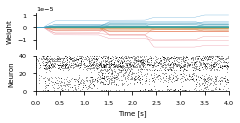

In [12]:
fig = plt.figure(figsize=(col_w, 1.75))

with sns.color_palette('husl', n_colors=int(1.5 * np.prod(weights_flattened.shape[1])), desat=0.8):
    ax1 = fig.add_subplot(2, 1, 1)
    ax1.plot(data['t'], weights_flattened, lw=0.3);
    ax1.xaxis.set_visible(False)
    ticker = ScalarFormatter()
    ticker.set_powerlimits((0, 0))
    ax1.yaxis.set_major_formatter(ticker)
    ax1.set_ylabel("Weight")

ax2 = fig.add_subplot(2, 1, 2, sharex=ax1)
plot_spikes(
    *preprocess_spikes(
        data['t'], data['stm_spikes'],
        num=40, sample_size=200, sample_filter_width=.2, cluster_filter_width=0.1),
    contrast_scale=0.5, ax=ax2)
ax2.set_xlabel("Time [s]")
ax2.set_ylabel("Neuron")

sns.despine(fig)
sns.despine(ax=ax1, bottom=True)
fig.tight_layout(h_pad=0)

In [13]:
fig.savefig('../../cogsci18-cue/plots/spikes.pdf',  bbox_inches='tight', pad_inches=0., dpi=600)